**2.1 Data Manipulation**

**2.1.1 Getting Started**

In [1]:
import torch

In [2]:
#tensors: n-dimensional arrays.
#create a new tensor
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
#change a matrix x with shape (3,4)
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((3, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
torch.randn(3, 4)

tensor([[ 1.0550,  0.9794,  1.7191,  0.2967],
        [-1.4541,  0.3765,  2.1559,  0.0643],
        [-0.1845, -0.4430, -0.9551,  1.5185]])

In [9]:
torch.tensor([[2, 1, 4, 5], [1, 2, 3, 4], [4, 1, 3, 7]])

tensor([[2, 1, 4, 5],
        [1, 2, 3, 4],
        [4, 1, 3, 7]])

**2.1.2 Operations**

In [10]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [11]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [12]:
#concatenate multiple tensors
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3], [1,2,3,4], [4,3,2,1]])
X, Y, torch.cat((X,Y), dim=0), torch.cat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [13]:
#construct a binary tensor via logical statements
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [14]:
#all the elements in the tensor yields a tensor with only one element
X.sum()

tensor(66.)

**2.1.3 Broadcasting**

In [15]:
#create a 3x1 and 1x2 matrices
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [16]:
#broadcasting produces a large 3x2 matrix by replicating matrix a along the columns and matrix b along the rows
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

**2.1.4 Indexing and Slicing**

In [17]:
#X[start:stop]: includes the first index(start) but not the last(stop)
X, X[-1], X[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [18]:
#write elements of a matrix by specifying indices
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
#assign multiple elements the same value
X[0:2, : ] =12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

**2.1.5 Saving Memory**

In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2198508995984
id(Z): 2198508995984


In [22]:
#use X[:] = X + Y or X += Y to reduce the memory
before = id(Y)
Y += X
id(Y) == before

True

**2.1.6 Conversion to Other Python Objects**

In [23]:
#converting to a NumPy tensor (ndarray), or vice versa
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
#to convert a size-1 tensor to a Python scalar
a = torch.tensor([3.5])
a, float(a), int(a)

(tensor([3.5000]), 3.5, 3)

**Summary**: The tensor class is the main interface for storing and manipulating data in deep learning libraries. Tensors provide a variety of functionalities including construction routines; indexing and slicing; basic mathematics operations; broadcasting; memory-efficient assignment; and conversion to and from other Python objects.

**2.2 Data Preprocessing**

**2.2.1 Reading the Dataset**

In [25]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [26]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,RoofType,Price
0,NaN,NaN,127500
1,2.0,NaN,106000
2,4.0,Slate,178100
3,NaN,NaN,140000


**2.2.2 Data Preparation**

In [27]:
#define inputs and outputs
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)
print(outputs)

   NumRooms RoofType
0       3.0      NaN
1       2.0      NaN
2       4.0    Slate
3       3.0      NaN
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


In [28]:
#For missing numerical values, one common heuristic (RoofType_nan) is to 
#replace the NaN entries with the mean value of the corresponding column.
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,3.0,0,1
1,2.0,0,1
2,4.0,1,0
3,3.0,0,1


**2.2.3 Conversion to the Tensor Format**

In [29]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

NameError: name 'targets' is not defined

**Discussion:** You now know how to partition data columns, impute missing variables, and load pandas data into tensors. In Section 5.7, you will pick up some more data processing skills. While this crash course kept things simple, data processing can get hairy. For example, rather than arriving in a single CSV file, our dataset might be spread across multiple files extracted from a relational database. For instance, in an e-commerce application, customer addresses might live in one table and purchase data in another. Moreover, practitioners face myriad data types beyond categorical and numeric, for example, text strings, images, audio data, and point clouds. Oftentimes, advanced tools and efficient algorithms are required in order to prevent data processing from becoming the biggest bottleneck in the machine learning pipeline. These problems will arise when we get to computer vision and natural language processing. Finally, we must pay attention to data quality. Real-world datasets are often plagued by outliers, faulty measurements from sensors, and recording errors, which must be addressed before feeding the data into any model. Data visualization tools such as seaborn, Bokeh, or matplotlib can help you to manually inspect the data and develop intuitions about the type of problems you may need to address.

**2.3 Linear Algebra**

**2.3.1 Scalars**

In [ ]:
#5, 9, 32 are constant scalars, c and f are unknown scalars
#scalars are implemented as tensors that contain only one element.
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x ** y

**2.3.2 Vectors**

In [ ]:
#a vector as a fixed-length array of scalars, we call these scalars the elements of the vector.
x = torch.arange(4)
x

In [ ]:
#Recall that we access a tensor’s elements via indexing
x[3]

In [ ]:
#to indicate that a vector contains n elements, we call n the dimensionality of the vector.
len(x)

In [ ]:
#The shape is a tuple that indicates a tensor’s length along each axis
x.shape

**2.3.3 Matrices**

In [ ]:
#0th_order tensor: scalars, 1st_order tensor: vectors, 2nd_order tensor: matrices
#m x n matrix: arranged as m rows and n columns
A = torch.arange(6).reshape(3, 2)
A

In [ ]:
#transpose: exchange a matrix’s rows and columns
A.T

In [ ]:
#symmetric matrix
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

In [ ]:
B == B.T

**2.3.4 Tensors**

In [ ]:
#Tensors give us a generic way of describing extensions to nth-order arrays.
#create 3-dimensional tensor
#each 2D array is one "slice" or "layer" of the 3D tensor.
torch.arange(24).reshape(2, 3, 4)

In [ ]:
#create 2-dimensional tensor (matrix)
torch.arange(24).reshape(3, 8)

**2.3.5 Basic Properties of Tensor Arithmetic**

In [ ]:
#elementwise operations produce outputs that have the same shape as their operands
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  #Assign a copy of A to B by allocating new memory
A, A + B

In [ ]:
#the elementwise product of two matrices is called their Hadamard product
A * B

In [ ]:
#adding or multiplying a scalar and a tensor produces a result with the same shape as the original tensor.
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, a * X

**2.3.6 Reduction**

In [ ]:
#calculate the sum of a tensor’s elements - produce a scalar.
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

In [ ]:
A, A.shape, A.sum()

In [ ]:
#to sum over all elements along the rows (axis 0)
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

In [ ]:
#axis=1 will reduce the column dimension (axis 1) by summing up elements of all the columns.
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

In [ ]:
A.sum(axis=[0, 1])

In [ ]:
#calculate the mean
A.mean(), A.sum()/A.numel()

In [ ]:
#the function for calculating the mean can also reduce a tensor along specific axes.
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

**2.3.7 Non-Reduction Sum**

In [ ]:
#keep the number of axes unchanged when calculating the sum or mean
sum_A = A.sum(axis=1, keepdims=True)
sum_A

In [ ]:
#divide A by sum_A with broadcasting to create a matrix where each row sums up to 1
#the 5x1 tensor sumA is broadcasted to match the dimensions of A (5x4).
A / sum_A

In [ ]:
#calculate the cumulative sum of elements of A along some axis, say axis=0 (row by row)
A.cumsum(axis=0)

**2.3.8 Dot product**

In [ ]:
#dot product: a sum over the products of the elements at the same position
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

In [ ]:
#we can calculate the dot product of two vectors by performing an elementwise multiplication followed by a sum
torch.sum(x * y)

In [ ]:
#dot products are useful
#(1) when the weights are nonnegative and sum to 1, the dot product expresses a weighted average. 
#(2) after normalizing two vectors to have unit length, the dot products express the cosine of the angle between them.

**2.3.9 Matrix-Vector Products**

In [ ]:
A, x

In [ ]:
#to express a matrix–vector product in code, we use the mv function.
#the column dimension of A (its length along axis 1) must be the same as the dimension of x (its length).
A.shape, x.shape, torch.mv(A, x)

**2.3.9 Matrix-Matrix Multiplication**

In [ ]:
B = torch.ones(4, 3)
A, B

In [ ]:
#to express a matrix–matrix multiplication (or matrix multiplication) in code, we use the mm function.
torch.mm(A, B)

**2.3.10 Norms**

In [ ]:
#L2 norm: measures the (Euclidean) length of a vector, is the square root of the sum of the squares of the elements.
#represents the Euclidean distance of the vector from the origin (0,0) in a 2-dimensional space. 
u = torch.tensor([3.0, -4.0])
torch.norm(u)

In [ ]:
#L1 norm: called the Manhattan distance, sums the absolute values of a vector’s elements.
torch.abs(u).sum()

In [ ]:
#Frobenius norm: the square root of the sum of the squares of a matrix’s elements
p = torch.ones(4, 9)
p, torch.norm(p)

**Summary**: 
1. Scalars, vectors, matrices, and tensors are the basic mathematical objects used in linear algebra and have zero, one, two, and an arbitrary number of axes, respectively.

2. Tensors can be sliced or reduced along specified axes via indexing, or operations such as sum and mean, respectively.

3. Elementwise products are called Hadamard products. By contrast, dot products, matrix–vector products, and matrix–matrix products are not elementwise operations and in general return objects having shapes that are different from the the operands.

4. Compared to Hadamard products, matrix–matrix products take considerably longer to compute (cubic rather than quadratic time).

5. Norms capture various notions of the magnitude of a vector (or matrix), and are commonly applied to the difference of two vectors to measure their distance apart.

6. Common vector norms include the and norms, and common matrix norms include the spectral and Frobenius norms.

**2.4 Calculus**

In [ ]:
#derivative is the rate of change in a function with respect to changes in its arguments.
#if f'(x) exists, f is said to be differentiable at x.

In [31]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import torch

In [32]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [33]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical_limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical_limit=2.30000
h=0.01000, numerical_limit=2.03000
h=0.00100, numerical_limit=2.00300
h=0.00010, numerical_limit=2.00030
h=0.00001, numerical_limit=2.00003


In [34]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [35]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [36]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [37]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [38]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

NameError: name 'd2l' is not defined

**Partial Derivatives and Gradients**  
Partial derivatives: the derivative that apply to multivariate functions.  
Gradients: The gradient of the function f with respect to x is a vector of n partial derivatives

**Chain Rule**: In deep learning, the gradients of concern are often difficult to calculate because we are working with deeply nested functions (of functions (of functions…)). Fortunately, the chain rule takes care of this. 

**2.5 Automatic Differentiation**

**2.5.1 A Simple Function**

In [39]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [40]:
#create a place to store the calculated gradient.
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default
print(x.grad)

None


In [41]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [42]:
#We can now take the gradient of y with respect to x by calling its backward method.
#Next, we can access the gradient via x’s grad attribute.
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [43]:
x.grad == 4 * x

tensor([True, True, True, True])

In [44]:
#Note that PyTorch does not automatically reset the gradient buffer when we record a new gradient.
#To reset the gradient buffer, we can call x.grad.zero_()
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

**2.5.2 Backward for Non-scalar variables**

In [45]:
#the derivative of y (vector) with respect to a vector x is a matrix called the Jacobian
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

**2.5.3 Detaching Computation**

In [46]:
#detach the respective computational graph from the final result, e.g., z=x*y and y=x*x
x.grad.zero_()
y = x * x
u = y.detach()  #create a new variable u that takes the same value as y
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [47]:
#calculate the gradient of y with respect to x.
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

**2.5.4 Gradients and Python Control Flow**

In [48]:
#we can still calculate the gradient of the resulting variable when a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls)
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c      

In [49]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [50]:
a.grad == d/a

tensor(True)

**Summary**:
Try to remember these basics: (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and (iv) access the resulting gradient.

**2.6 Probability and Statistics**

In [64]:
pip install d2l

Note: you may need to restart the kernel to use updated packages.


In [70]:
import torchvision

ModuleNotFoundError: No module named 'torchvision'

In [5]:
%matplotlib inline
import random
import torch
import numpy as np
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [2]:
num_tosses = 100
heads = sum([random.random( ) > 0.5 for i in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [45, 55]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([57., 43.])

In [9]:
np.random.multinomial(10, fair_probs)

array([6, 4])

In [14]:
fair_probs = [1 / 6] * 6
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts /1000

array([0.16 , 0.15 , 0.17 , 0.175, 0.168, 0.177], dtype=float32)

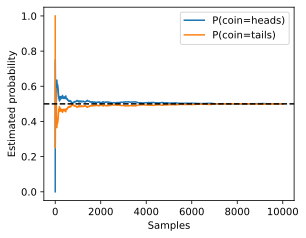

In [19]:
fair_probs = torch.tensor([0.5, 0.5])
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

Summary:  
1. 我们可以从概率分布中采样。  
我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。  
期望和方差为概率分布的关键特征的概括提供了实用的度量形式。